# ODI Player Performance EDA

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv(r"C:\University Work\cricket-performance-prediction\cricket-performance-prediction\data\cleaned_data\cleaned_odi.csv")

## Dataset Columns Overview

In [4]:
df.columns.tolist()

['mid',
 'date',
 'venue',
 'bat_team',
 'bowl_team',
 'batsman',
 'bowler',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'striker',
 'non-striker',
 'total']

## Summary Statistics

In [5]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


## Correlation Heatmap

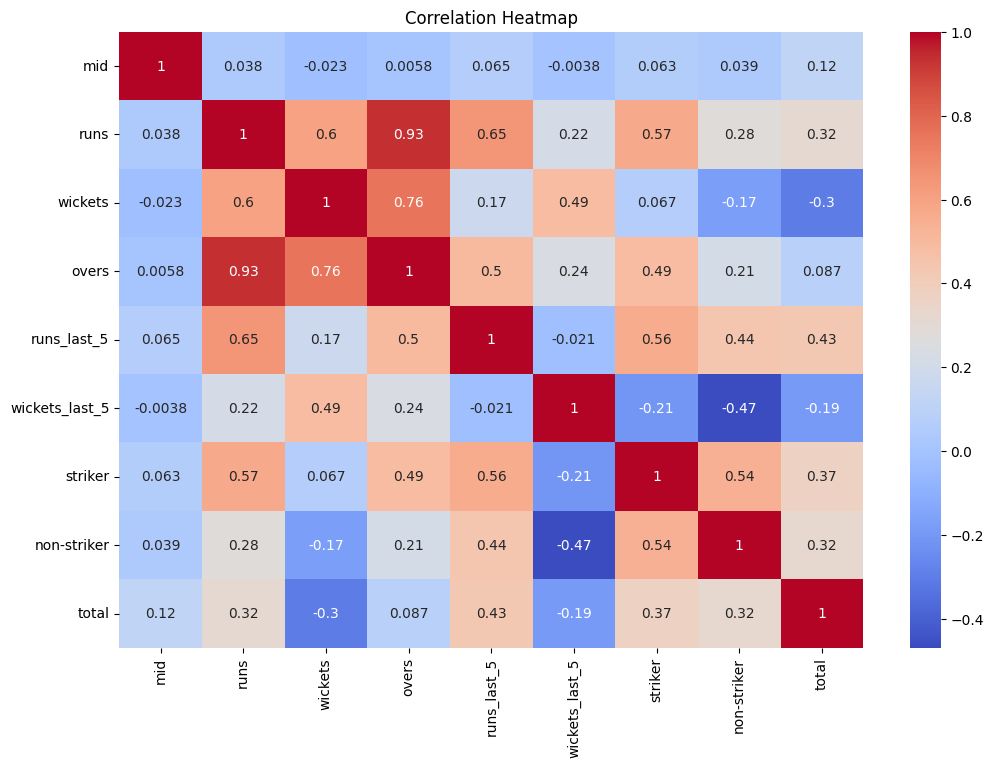

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight:**
Correlations help us identify relationships between variables such as runs, wickets, and total score.

## Top 10 Batters by Runs

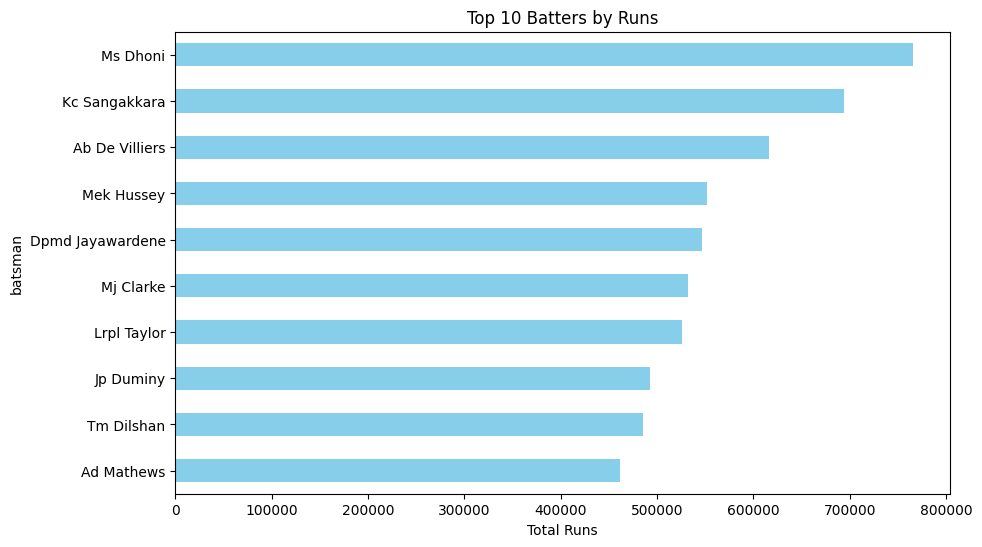

In [7]:
top_batters = df.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Total Runs')
plt.title('Top 10 Batters by Runs')
plt.gca().invert_yaxis()
plt.show()

## Top 10 Bowlers by Wickets

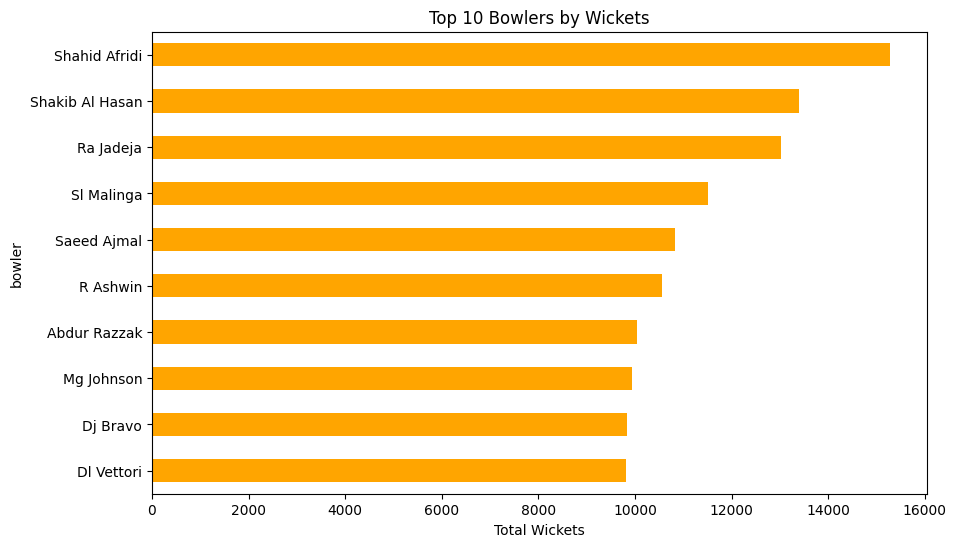

In [8]:
top_bowlers = df.groupby('bowler')['wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Total Wickets')
plt.title('Top 10 Bowlers by Wickets')
plt.gca().invert_yaxis()
plt.show()

## Scatter Plot: Strike Rate vs Total Runs

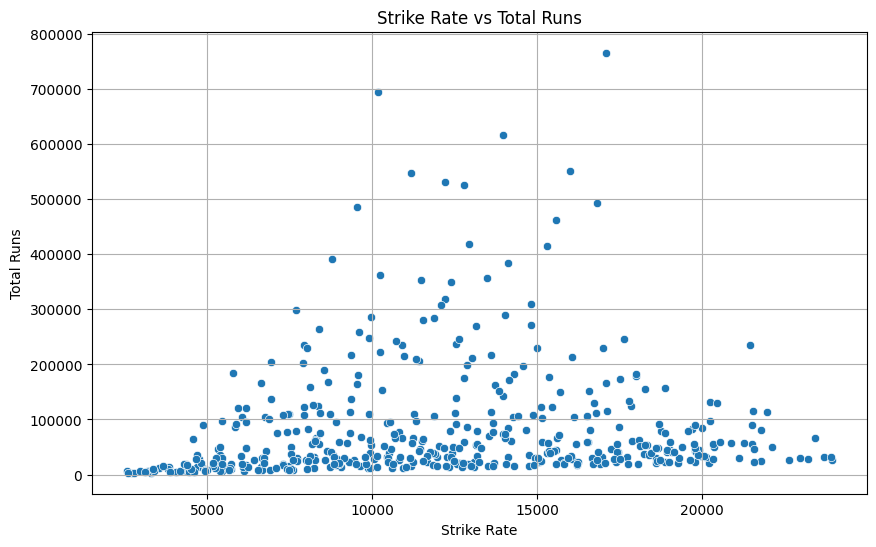

In [10]:
# Estimate strike rate using available data
bat_summary = df.groupby('batsman').agg({
    'runs': 'sum',
    'mid': 'count'   # Count of entries per batsman as proxy for balls faced
}).rename(columns={'mid': 'balls_faced'}).reset_index()

# Calculate strike rate
bat_summary['strike_rate'] = (bat_summary['runs'] / bat_summary['balls_faced']) * 100

# Filter for significant contributors
bat_summary = bat_summary[bat_summary['balls_faced'] >= 100]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bat_summary, x='strike_rate', y='runs')
plt.title("Strike Rate vs Total Runs")
plt.xlabel("Strike Rate")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()


**Insight:**
This plot helps identify high-impact aggressive batters who combine consistency with acceleration.